## Разработка моделей предсказания возникновения сердечно-сосудистых заболеваний

#### Описания столбцов:
* id (Уникальный идентификатор для каждого пациента)
* age (возраст пациента в годах)
* origin (место сбора данных)
* sex (мужской/женский)
* cp chest pain type (тип боли в груди - [типичная стенокардия, атипичная стенокардия, неангинальная, бессимптомная])
* trestbps resting blood pressure (артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу))
* chol (холестерин в сыворотке крови в мг/дл)
* fbs (если уровень сахара в крови натощак > 120 мг/дл)
* restecg (результаты электрокардиографии в состоянии покоя - [норма, аномалия stt, гипертрофия lv])
* thalach (максимальная частота сердечных сокращений)
* exang (стенокардия, вызванная физической нагрузкой (правда/ложь))
* oldpeak (Депрессия ST-сегмента, вызванная физической нагрузкой по сравнению с покоем)
* slope (наклон сегмента ST пика физической нагрузки)
* ca (количество крупных сосудов (0-3), окрашенных при рентгеноскопии)
* thal (талассемии  - [норма; фиксированный дефект; обратимый дефект])
* num (прогнозируемый признак - [0=нет сердечных заболеваний; 1,2,3,4 = какое-то сердечное заболевание])

In [927]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

pd.options.mode.chained_assignment = None

In [928]:
# Загружаем данные
df = pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Обработка данных

In [930]:
# повторяющих строк нет
df.duplicated().sum()

0

In [931]:
# количество пустых значений по столбцам
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Из датасета видно общее количество наблюдений - 920.  
Столбец id - просто порядковый номер, не интересен для анализа.    
Также не интересен столбец dataset, просто информация о месте сбора данных.

In [932]:
# удаляем ненужные столбцы
df = df.drop(['id', 'dataset'], axis=1)

#### Работа со столбцами с пустыми значениями

In [933]:
# количество пустых значений по столбцам
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

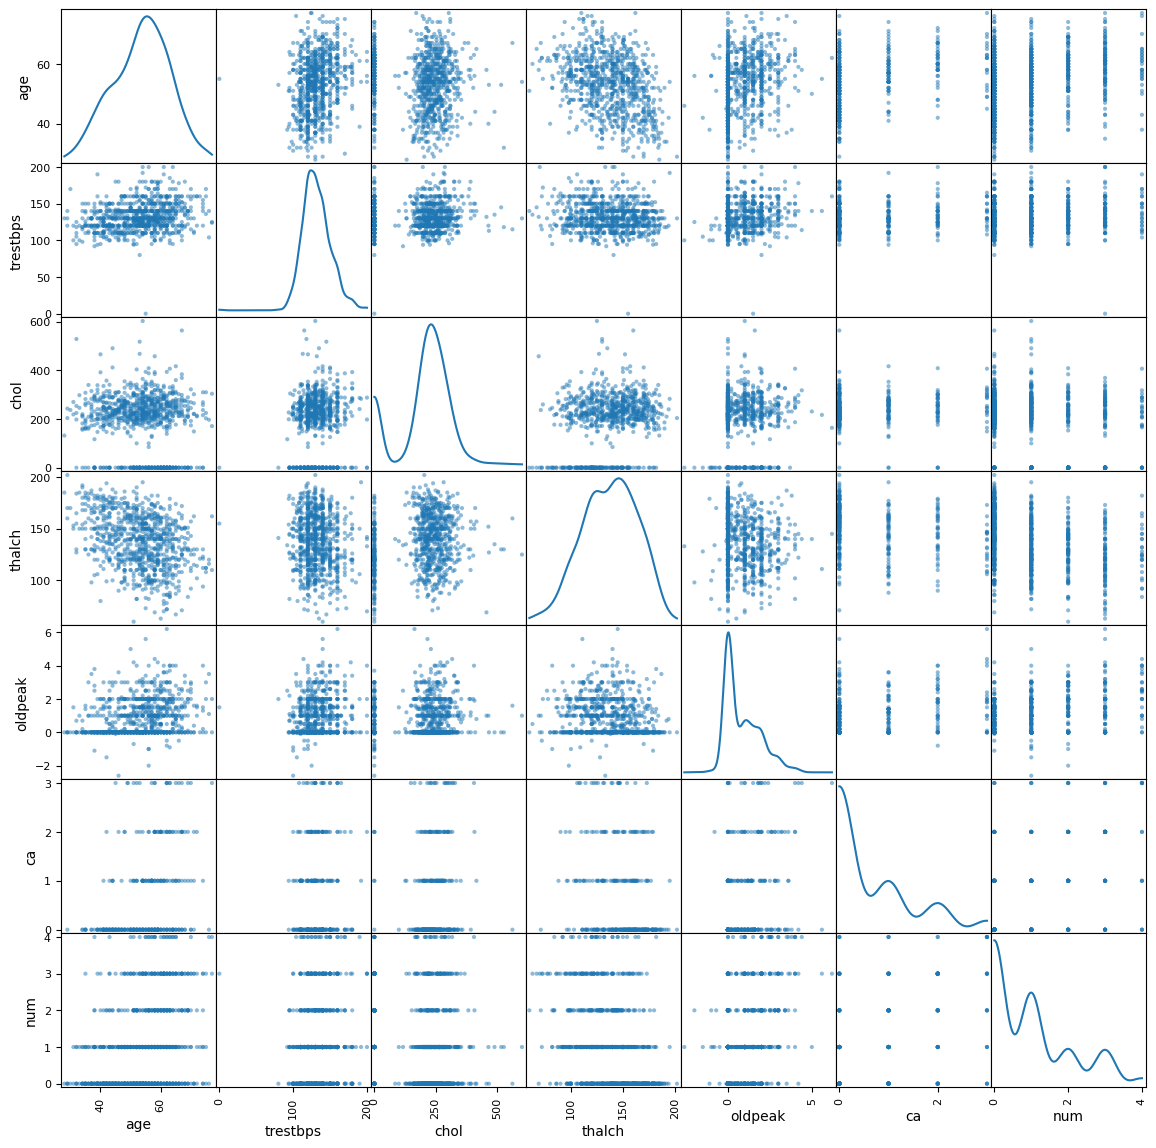

In [934]:
# построим диаграмму рассеяния
scatter_matrix(df, diagonal='kde', figsize=(14, 14));

На диаграмме видно что на всех парах корреляция слабая. Нет смысла интерполировать данные.

In [935]:
# удаляем строки где встречаются пустые значения
df.dropna(inplace=True, axis=0)

In [936]:
# проверяем количество пустых значений по столбцам
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [938]:
# значения категориальных признаков
cats = df.select_dtypes(include='object').columns.to_list()
for cat in cats:
    print(f"{cat} - {df[cat].unique()}")

sex - ['Male' 'Female']
cp - ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs - [True False]
restecg - ['lv hypertrophy' 'normal' 'st-t abnormality']
exang - [False True]
slope - ['downsloping' 'flat' 'upsloping']
thal - ['fixed defect' 'normal' 'reversable defect']


Столбцы sex, fbs, exang - бинарные признаки. Необходимо их перекодировать.

In [939]:
df['sex'] = (df['sex'] == 'Male') * 1
df['fbs'] = (df['fbs'] == 'True') * 1
df['exang'] = (df['exang'] == 'True') * 1

### Дамми-кодирование

In [940]:
cols = ['cp', 'restecg', 'slope', 'thal']
for col in cols:
    new_dum_cols = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, new_dum_cols], axis=1)
df = df.drop(columns=cols, axis=1)
df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,0,150.0,0,2.3,0.0,0,...,True,True,False,False,True,False,False,True,False,False
1,67,1,160.0,286.0,0,108.0,0,1.5,3.0,2,...,False,True,False,False,False,True,False,False,True,False
2,67,1,120.0,229.0,0,129.0,0,2.6,2.0,1,...,False,True,False,False,False,True,False,False,False,True
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,False,False,True,False,True,False,False,False,True,False
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,1,144.0,193.0,0,141.0,0,3.4,2.0,2,...,False,False,True,False,False,True,False,False,False,True
300,57,1,130.0,131.0,0,115.0,0,1.2,1.0,3,...,False,False,True,False,False,True,False,False,False,True
301,57,0,130.0,236.0,0,174.0,0,0.0,1.0,1,...,False,True,False,False,False,True,False,False,True,False
508,47,1,150.0,226.0,0,98.0,0,1.5,0.0,1,...,False,False,True,False,False,True,False,False,False,True


In [941]:
# Уникальные значения для num
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

Будем рассматривать задачу "предсказание возникновения сердечно-сосудистых заболеваний" как задачу бинарной классификации, т.е. 1 - у пациента полезнь сердца, 0 - нет сердечных заболеваний.

In [942]:
# приведем целевой признак к двум значениям
df['num'].replace({2: 1, 3: 1, 4: 1}, inplace =True)

### Подготовка данных для обучения

In [943]:
X = df.drop(['num'], axis=1)
y = df['num']

In [944]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [945]:
y_train.value_counts()

num
0    125
1    114
Name: count, dtype: int64

Данных мало, но они хорошо сбалансированны.

### Обучение

In [946]:
# 1 модель Дерево принятия решений
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=2, min_samples_split=9)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.71      0.88      0.79        25

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.82      0.80      0.80        60



In [947]:
# 2 модель экстремально случайных деревьев
etc = ExtraTreesClassifier(criterion='entropy', max_depth=2, max_features=2, min_samples_split=9)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.96      0.83      0.89        29

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



In [950]:
# 3 модель метод случаного леса
#rfc = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=2, min_samples_split=9)
rfc = RandomForestClassifier(criterion='entropy', max_depth=29, max_features=1, min_samples_split=8)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.92      0.85      0.88        27

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [949]:
# поиск гиперпараметров
# grfc = RandomForestClassifier(criterion='entropy')
# params = {'max_depth': range(1,30), 'max_features': range(10), 'min_samples_split': range(10)}
# grid = GridSearchCV(grfc, params, cv=5)
# grid.fit(X_train, y_train)
# grid.best_params_